# <center> Customer Churn Prediction </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/archive (7)/Churn_Modelling.csv")

## EDA

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.shape

(10000, 14)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.drop(['RowNumber', 'Surname'], axis = 1, inplace = True)

In [12]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Data Visualization

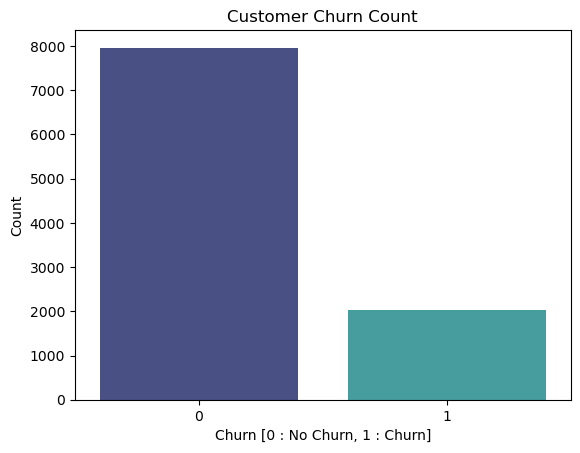

In [14]:
sns.countplot(x = 'Exited', data = df, palette = 'mako')
plt.title('Customer Churn Count')
plt.xlabel('Churn [0 : No Churn, 1 : Churn]')
plt.ylabel('Count')
plt.show()

In [15]:
df['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


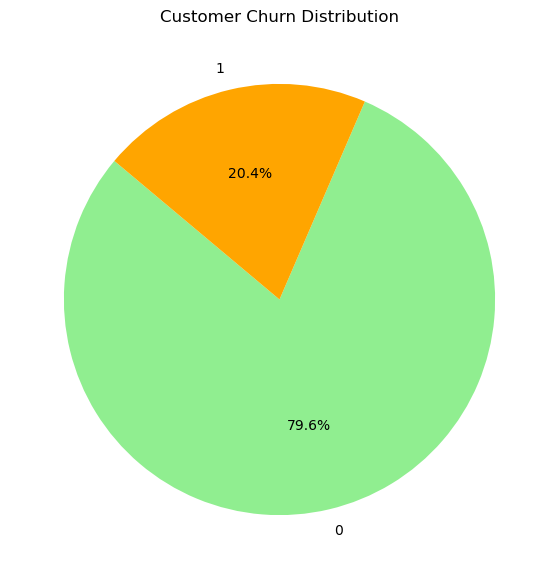

In [16]:
churn_counts = df['Exited'].value_counts()
colors = ['lightgreen', 'orange']
plt.figure(figsize=(8, 7))
plt.pie(churn_counts, labels = churn_counts.index, colors = colors, autopct = '%1.1f%%', startangle = 140)
plt.title('Customer Churn Distribution')
plt.show()

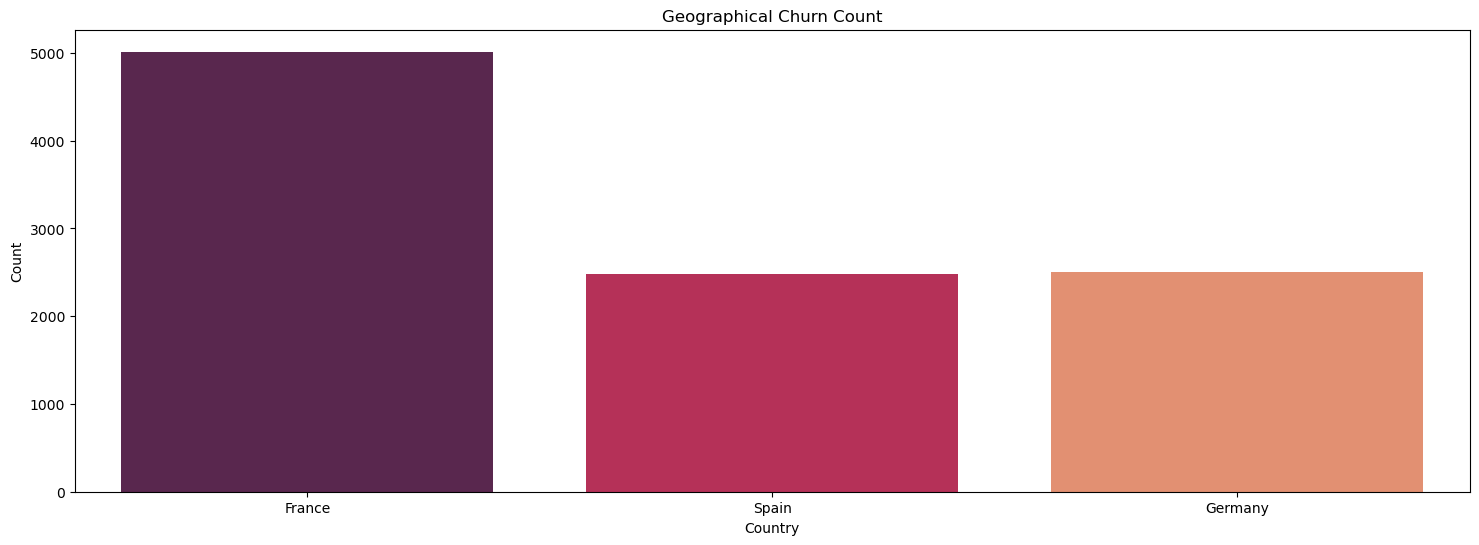

In [17]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'Geography', data = df, palette = 'rocket')
plt.title('Geographical Churn Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [18]:
geo_name = {'France' : 0,'Spain' : 1,'Germany' : 2}
df['Geography'] = df['Geography'].map(geo_name)

In [19]:
gen_change = {'Female' : 0,'Male' : 1}
df['Gender'] = df['Gender'].map(gen_change)

In [20]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Splitting the dataset

In [24]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(X_train[:10])

[[ 0.16958176  0.31701997 -1.09168714 -0.46460796  0.00666099 -1.21571749
   0.8095029   0.64259497 -1.03227043  1.10643166]
 [-2.30455945  1.52644283  0.91601335  0.30102557 -1.37744033 -0.00631193
  -0.92159124  0.64259497  0.9687384  -0.74866447]
 [-1.19119591 -0.89240289 -1.09168714 -0.94312892 -1.031415    0.57993469
  -0.92159124  0.64259497 -1.03227043  1.48533467]
 [ 0.03556578  0.31701997  0.91601335  0.10961719  0.00666099  0.47312769
  -0.92159124  0.64259497 -1.03227043  1.27652776]
 [ 2.05611444  0.31701997 -1.09168714  1.73658844  1.04473698  0.8101927
   0.8095029   0.64259497  0.9687384   0.55837842]
 [ 1.29325423  1.52644283 -1.09168714 -0.17749539 -1.031415    0.44253504
   0.8095029   0.64259497 -1.03227043  1.63252134]
 [ 1.6128308  -0.89240289  0.91601335  0.77954653 -1.37744033  0.30432823
  -0.92159124 -1.55619021 -1.03227043  0.48149647]
 [-0.54173384  0.31701997  0.91601335  0.20532138  1.04473698 -1.21571749
   0.8095029   0.64259497  0.9687384   1.07382167]
 

In [28]:
print(X_test[:10])

[[-0.55204276  1.52644283 -1.09168714 -0.36890377  1.04473698  0.8793029
  -0.92159124  0.64259497  0.9687384   1.61085707]
 [-1.31490297 -0.89240289 -1.09168714  0.10961719 -1.031415    0.42972196
  -0.92159124  0.64259497 -1.03227043  0.49587037]
 [ 0.57162971  0.31701997 -1.09168714  0.30102557  1.04473698  0.30858264
  -0.92159124  0.64259497  0.9687384  -0.42478674]
 [ 1.41696129 -0.89240289  0.91601335 -0.65601634 -0.33936434  0.57533623
  -0.92159124 -1.55619021 -1.03227043 -0.18777657]
 [ 0.57162971  1.52644283  0.91601335 -0.08179119  0.00666099  1.38961097
   0.8095029   0.64259497  0.9687384   0.61684179]
 [ 0.20050853  0.31701997 -1.09168714  1.73658844 -0.68538967  1.5900207
   0.8095029   0.64259497 -1.03227043 -0.01930192]
 [-0.62420521  0.31701997  0.91601335 -0.46460796 -1.72346566 -0.1640232
   0.8095029  -1.55619021  0.9687384   1.04587113]
 [-0.14999481  0.31701997 -1.09168714 -0.94312892  0.35268632  1.30238547
   0.8095029   0.64259497  0.9687384   0.01616599]
 [-

In [29]:
print(y_train[:10])

[0 0 0 0 0 0 0 0 0 0]


In [30]:
print(y_test[:10])

[0 1 0 0 0 1 0 0 1 1]


## Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
print('The Predicted value of Exited(Churn) is: ', model.predict(scaler.transform([[699, 0, 0, 39, 1, 0.00, 2, 0, 0, 93826.63]])))
print('The Predicted value of Exited(Churn) is: ', model.predict(scaler.transform([[653, 2, 1, 58, 1, 132602.88, 1, 1, 0, 5097.67]])))

The Predicted value of Exited(Churn) is:  [0]
The Predicted value of Exited(Churn) is:  [1]


In [35]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:40])

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix on the Predicted Test Result is\n', cm)

Confusion Matrix on the Predicted Test Result is
 [[1531   64]
 [ 314   91]]


In [38]:
print('Model Accuracy Score is ', accuracy_score(y_test, y_pred))

Model Accuracy Score is  0.811


In [39]:
report = classification_report(y_test, y_pred)
print('The Classification Reports of the Model Performed is \n ', report)

The Classification Reports of the Model Performed is 
                precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.22      0.33       405

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000

